In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#read data
ads = pd.read_excel("sample_data.xlsx", sheet_name=0, header=1)
ads.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [26]:
ads.shape

(40679, 12)

In [27]:
#type for each columns
column_formats = ads.dtypes
print(column_formats)

p_date                               int64
ad_id                                int64
delivery_country                    object
queue_market                        object
punish_num                         float64
latest_punish_begin_date    datetime64[ns]
ad_revenue                         float64
avg_ad_revenue                     float64
start_time                  datetime64[ns]
baseline_st                        float64
product_line                        object
task_type_en                        object
dtype: object


In [28]:
ads.describe()

,p_date,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,40679.0,4.067900e+04,2393.00000,29908.000000,40679.000000,40679.000000
mean,20230807.0,1.772982e+15,1.14041,74.508358,23.887703,1.206670
std,0.0,2.562183e+12,0.84125,490.403509,187.580436,0.659845
min,20230807.0,1.697828e+15,1.00000,0.000000,0.000000,0.540000
25%,20230807.0,1.773396e+15,1.00000,1.390450,0.835250,0.540000
50%,20230807.0,1.773532e+15,1.00000,5.979250,2.597900,1.400000
75%,20230807.0,1.773564e+15,1.00000,20.260000,8.269100,1.780000
max,20230807.0,1.773617e+15,16.00000,27100.620000,17144.498600,7.590000


In [29]:
dist_country = ads['delivery_country'].nunique()
print(dist_country)


59


In [30]:
dist_qm = ads['queue_market'].nunique()
print(dist_qm)

51


In [31]:
dist_pl = ads['product_line'].nunique()
print(dist_pl)
ads['product_line'].value_counts()

4


Non-Auction Ads    18669
Auction Ads        13006
RIE                 9001
Shopping Ads           3
Name: product_line, dtype: int64

In [32]:
dist_task_type = ads['task_type_en'].nunique()
print(dist_task_type)
ads['task_type_en'].value_counts()

9


Promote                     18291
auction_relation            10808
Ad Group Recall (Merged)     6164
Promote Report Recall        2837
auction_all                  2197
R&F                           355
Branding Ads                   23
Shopping Ad Group               3
Auction Ad Group                1
Name: task_type_en, dtype: int64

In [33]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                  38286
latest_punish_begin_date        0
ad_revenue                  10771
avg_ad_revenue                  0
start_time                   6675
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [34]:
ads['punish_num'] = ads['punish_num'].fillna(0)
ads['ad_revenue'].fillna(ads['avg_ad_revenue'], inplace=True)
ads['start_time'].fillna(ads['latest_punish_begin_date'], inplace=True)

In [35]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                      0
latest_punish_begin_date        0
ad_revenue                      0
avg_ad_revenue                  0
start_time                      0
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [36]:
ads['p_date'] = pd.to_datetime(ads['p_date'], format='%Y%m%d')  # You may need to specify the format if it's not in YYYYMMDD format
ads['start_time'] = pd.to_datetime(ads['start_time'], format='%Y%m%d')
#ads['start_time'] = ads['start_time'].dt.date
#ads['date_difference'] = ads['start_time'] - ads['p_date']
ads['date_difference_bet_start_date'] = (ads['p_date'] - ads['start_time']).dt.days 
ads['date_difference_bet_punish_date'] = (ads['p_date'] - ads['latest_punish_begin_date']).dt.days

In [37]:
ads.describe()

,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date
count,4.067900e+04,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000
mean,1.772982e+15,0.067086,58.626704,23.887703,1.206670,1391.241083,8113.368200
std,2.562183e+12,0.337079,430.908998,187.580436,0.659845,3163.659347,2022.510702
min,1.697828e+15,0.000000,0.000000,0.000000,0.540000,-38.000000,0.000000
25%,1.773396e+15,0.000000,0.810100,0.835250,0.540000,-1.000000,8619.000000
50%,1.773532e+15,0.000000,3.750000,2.597900,1.400000,0.000000,8619.000000
75%,1.773564e+15,0.000000,14.469250,8.269100,1.780000,10.000000,8619.000000
max,1.773617e+15,16.000000,27100.620000,17144.498600,7.590000,8619.000000,8619.000000


                                 punish_num  avg_ad_revenue  baseline_st  \
punish_num                         1.000000       -0.006130     0.159030   
avg_ad_revenue                    -0.006130        1.000000     0.108312   
baseline_st                        0.159030        0.108312     1.000000   
date_difference_bet_start_date    -0.086816       -0.051805    -0.441101   
date_difference_bet_punish_date   -0.795954        0.007237    -0.174157   

                                 date_difference_bet_start_date  \
punish_num                                            -0.086816   
avg_ad_revenue                                        -0.051805   
baseline_st                                           -0.441101   
date_difference_bet_start_date                         1.000000   
date_difference_bet_punish_date                        0.109345   

                                 date_difference_bet_punish_date  
punish_num                                             -0.795954  
avg_ad

/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/1725990362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ads[['punish_num', 'latest_punish_begin_date','avg_ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']].corr()


<AxesSubplot: >

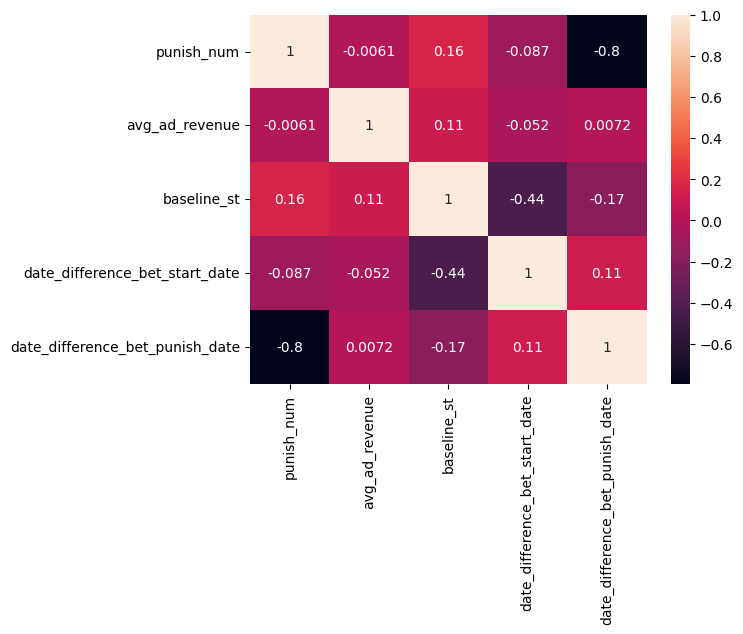

In [39]:
correlation_matrix = ads[['punish_num', 'latest_punish_begin_date','avg_ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, annot = True, annot_kws={'size':10})


# would it be concerning for punish num and date_difference_bet_punish_date  to have such a high negative correlation?

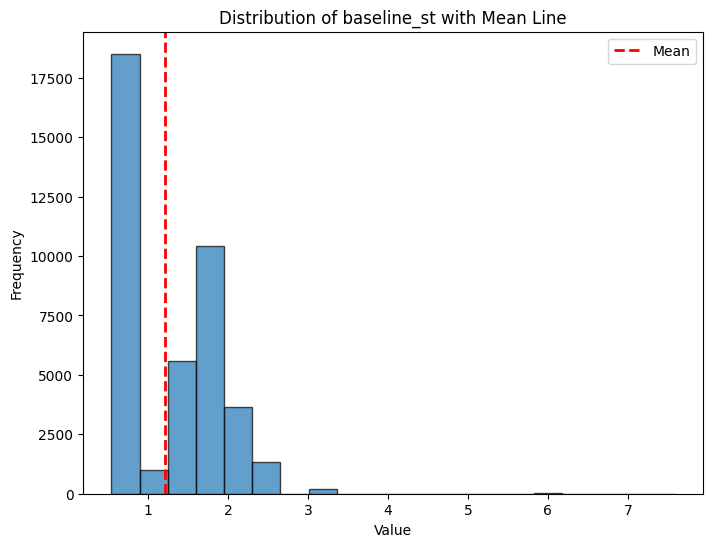

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(ads['baseline_st'], bins=20, edgecolor='k', alpha=0.7)  # Add alpha for transparency
plt.axvline(ads['baseline_st'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of baseline_st with Mean Line')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Add legend to label the Mean line
plt.show()

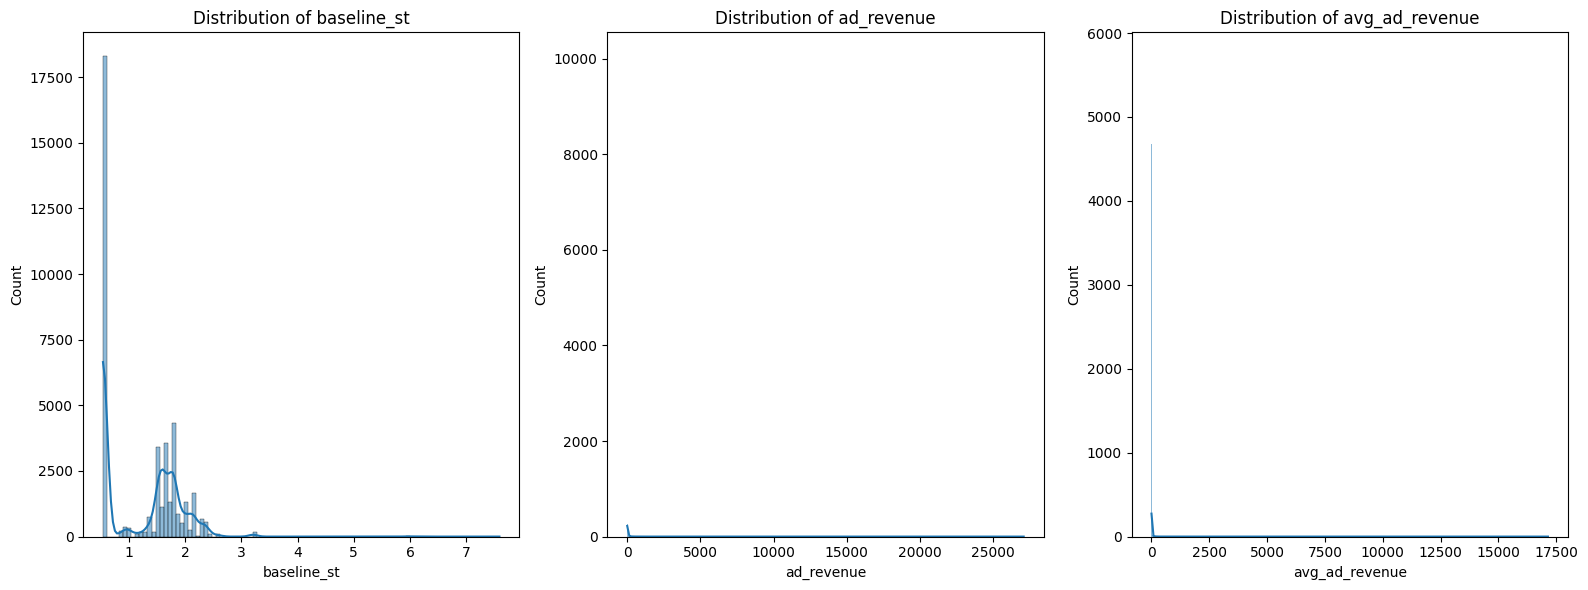

In [41]:

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()

plt.show()


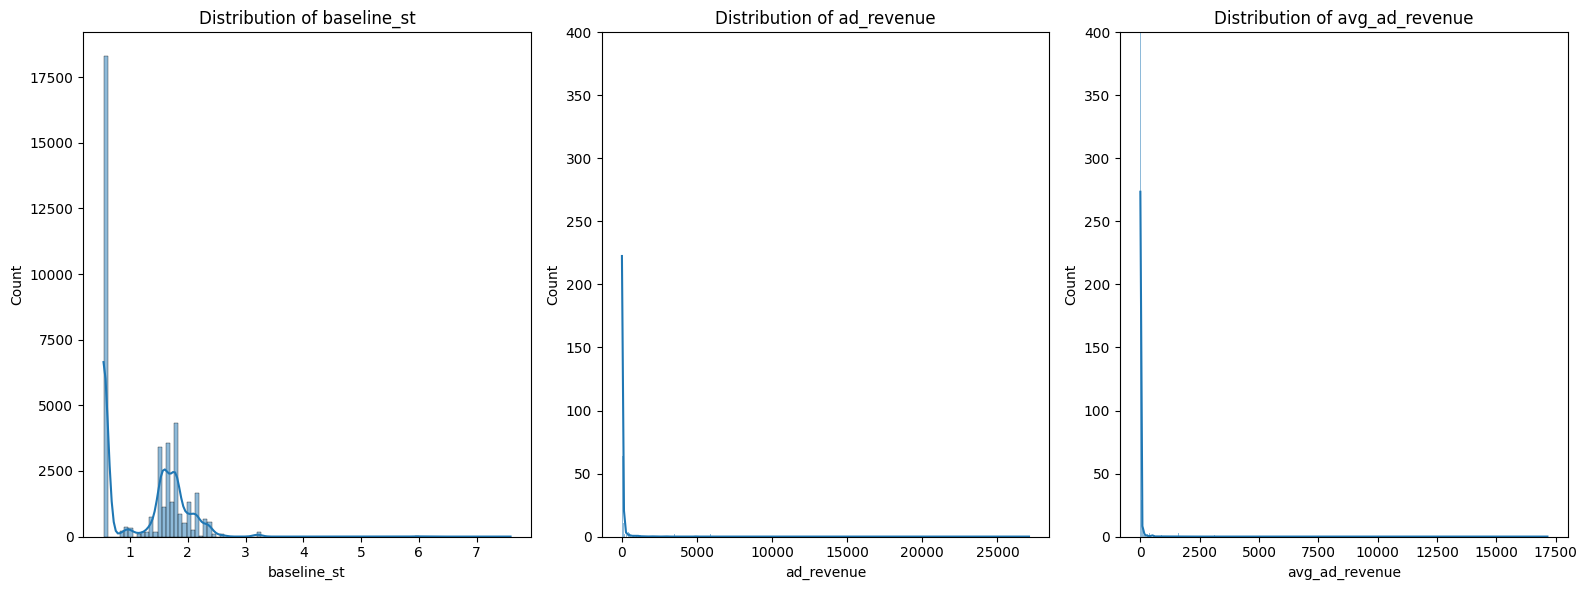

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ads' is your DataFrame

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

    # Set the ylim for the 'ad_revenue' column
    if column == 'ad_revenue':
        axes[i].set_ylim(0, 400) 
    if column == 'avg_ad_revenue':
        axes[i].set_ylim(0, 400)
         # Replace 0 and 1000 with your desired limits

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [19]:
used = ads[['punish_num','avg_ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']]

In [46]:
used.describe()

,punish_num,avg_ad_revenue,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date,punish_num_scaled,avg_ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04
mean,0.067086,23.887703,1.206670,-1392.074436,-8113.368200,-5.589461e-18,8.384191e-18,8.943137e-17,-4.471569e-17,-9.502083e-17
std,0.337079,187.580436,0.659845,3163.294581,2022.510702,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,0.000000,0.000000,0.540000,-8619.000000,-8619.000000,-1.990248e-01,-1.273480e-01,-1.010355e+00,-2.284648e+00,-2.500051e-01
25%,0.000000,0.835250,0.540000,-11.000000,-8619.000000,-1.990248e-01,-1.228952e-01,-1.010355e+00,4.365991e-01,-2.500051e-01
50%,0.000000,2.597900,1.400000,-1.000000,-8619.000000,-1.990248e-01,-1.134983e-01,2.929969e-01,4.397604e-01,-2.500051e-01
75%,0.000000,8.269100,1.780000,0.000000,-8619.000000,-1.990248e-01,-8.326452e-02,8.688965e-01,4.400765e-01,-2.500051e-01
max,16.000000,17144.498600,7.590000,37.000000,0.000000,4.726820e+01,9.127189e+01,9.674099e+00,4.517733e-01,4.011582e+00


In [43]:
used.columns

Index(['punish_num', 'avg_ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date'],
      dtype='object')

In [44]:
# standarisation
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']] = scaler.fit_transform(used[['punish_num', 'avg_ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date']])


print(used.head())
used.describe()

   punish_num  avg_ad_revenue  baseline_st  date_difference_bet_start_date  \
0         1.0        4795.250         1.78                            -287   
1         1.0        1063.767         1.67                            -166   
2         2.0           5.365         1.84                            -389   
3         2.0           5.365         1.58                            -389   
4         2.0           5.365         1.58                            -389   

   date_difference_bet_punish_date  punish_num_scaled  avg_ad_revenue_scaled  \
0                              -14           2.767677              25.436666   
1                              -54           2.767677               5.543713   
2                              -14           5.734378              -0.098747   
3                              -14           5.734378              -0.098747   
4                              -14           5.734378              -0.098747   

   baseline_st_scaled  date_diff_bet_start_date_sc

,punish_num,avg_ad_revenue,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date,punish_num_scaled,avg_ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04
mean,0.067086,23.887703,1.206670,-1392.074436,-8113.368200,-5.589461e-18,8.384191e-18,8.943137e-17,-4.471569e-17,-9.502083e-17
std,0.337079,187.580436,0.659845,3163.294581,2022.510702,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,0.000000,0.000000,0.540000,-8619.000000,-8619.000000,-1.990248e-01,-1.273480e-01,-1.010355e+00,-2.284648e+00,-2.500051e-01
25%,0.000000,0.835250,0.540000,-11.000000,-8619.000000,-1.990248e-01,-1.228952e-01,-1.010355e+00,4.365991e-01,-2.500051e-01
50%,0.000000,2.597900,1.400000,-1.000000,-8619.000000,-1.990248e-01,-1.134983e-01,2.929969e-01,4.397604e-01,-2.500051e-01
75%,0.000000,8.269100,1.780000,0.000000,-8619.000000,-1.990248e-01,-8.326452e-02,8.688965e-01,4.400765e-01,-2.500051e-01
max,16.000000,17144.498600,7.590000,37.000000,0.000000,4.726820e+01,9.127189e+01,9.674099e+00,4.517733e-01,4.011582e+00


In [57]:
df2 = used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']]


df2['risk'] = 0.8 * df2['punish_num_scaled'] + 0.2 * np.abs(df2['date_difference_bet_punish_date_scaled'])
df2['profitability'] = df2['avg_ad_revenue_scaled']
df2['priority'] = - np.abs(df2['date_diff_bet_start_date_scaled']) #the less days given, the more urgent
df2['complexity'] = df2['baseline_st_scaled']

print(df2.head())
df2.describe()


   punish_num_scaled  avg_ad_revenue_scaled  baseline_st_scaled  \
0           2.767677              25.436666            0.868897   
1           2.767677               5.543713            0.702189   
2           5.734378              -0.098747            0.959828   
3           5.734378              -0.098747            0.565791   
4           5.734378              -0.098747            0.565791   

   date_diff_bet_start_date_scaled  date_difference_bet_punish_date_scaled  \
0                         0.349347                                4.004660   
1                         0.387599                                3.984882   
2                         0.317102                                4.004660   
3                         0.317102                                4.004660   
4                         0.317102                                4.004660   

       risk  profitability  priority  complexity  
0  3.015073      25.436666 -0.349347    0.868897  
1  3.011118       5.543713

/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/2510175029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['risk'] = 0.8 * df2['punish_num_scaled'] + 0.2 * np.abs(df2['date_difference_bet_punish_date_scaled'])
/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/2510175029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profitability'] = df2['avg_ad_revenue_scaled']
/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/2510175029.py:6: SettingWithCopy

,punish_num_scaled,avg_ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled,risk,profitability,priority,complexity
count,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,40679.000000,4.067900e+04,40679.000000,4.067900e+04
mean,-5.589461e-18,8.384191e-18,8.943137e-17,-4.471569e-17,-9.502083e-17,0.094119,8.384191e-18,-0.734610,8.943137e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.946519,1.000012e+00,0.678498,1.000012e+00
min,-1.990248e-01,-1.273480e-01,-1.010355e+00,-2.284648e+00,-2.500051e-01,-0.109219,-1.273480e-01,-2.284648,-1.010355e+00
25%,-1.990248e-01,-1.228952e-01,-1.010355e+00,4.365991e-01,-2.500051e-01,-0.109219,-1.228952e-01,-0.440076,-1.010355e+00
50%,-1.990248e-01,-1.134983e-01,2.929969e-01,4.397604e-01,-2.500051e-01,-0.109219,-1.134983e-01,-0.440076,2.929969e-01
75%,-1.990248e-01,-8.326452e-02,8.688965e-01,4.400765e-01,-2.500051e-01,-0.109219,-8.326452e-02,-0.439444,8.688965e-01
max,4.726820e+01,9.127189e+01,9.674099e+00,4.517733e-01,4.011582e+00,38.613513,9.127189e+01,-0.175792,9.674099e+00


In [58]:
### adjust beta here 

beta0 = 0 # the coefficient given for ads with no records at all
beta1 = 1 # for risk
beta2 = 1.5 # for profitability
beta3 = 1.5 # for priority
beta4 = 0.5 # for complexity

# calculating score
df2['ads_score'] = (
   beta0 * df2['risk'] +
   beta1 * df2['profitability'] +
   beta2 * df2['priority'] +
   beta3 * df2['complexity']
)

# Print the DataFrame with the predicted scores
print(df2[['ads_score']])



       ads_score
0      26.215990
1       6.015598
2       0.865343
3       0.274288
4       0.274288
...          ...
40674  -5.069852
40675  -5.069852
40676  -5.069852
40677  -5.069852
40678  -5.069852

[40679 rows x 1 columns]


In [59]:
min_score = min(df2['ads_score'])
max_score = max(df2['ads_score'])

df2['ads_score'] = df2['ads_score'].apply(lambda x: (x-min_score)/(max_score-min_score))

df2.describe()

,punish_num_scaled,avg_ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled,risk,profitability,priority,complexity,ads_score
count,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,40679.000000,4.067900e+04,40679.000000,4.067900e+04,40679.000000
mean,-5.589461e-18,8.384191e-18,8.943137e-17,-4.471569e-17,-9.502083e-17,0.094119,8.384191e-18,-0.734610,8.943137e-17,0.040882
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.946519,1.000012e+00,0.678498,1.000012e+00,0.025395
min,-1.990248e-01,-1.273480e-01,-1.010355e+00,-2.284648e+00,-2.500051e-01,-0.109219,-1.273480e-01,-2.284648,-1.010355e+00,0.000000
25%,-1.990248e-01,-1.228952e-01,-1.010355e+00,4.365991e-01,-2.500051e-01,-0.109219,-1.228952e-01,-0.440076,-1.010355e+00,0.028558
50%,-1.990248e-01,-1.134983e-01,2.929969e-01,4.397604e-01,-2.500051e-01,-0.109219,-1.134983e-01,-0.440076,2.929969e-01,0.050401
75%,-1.990248e-01,-8.326452e-02,8.688965e-01,4.400765e-01,-2.500051e-01,-0.109219,-8.326452e-02,-0.439444,8.688965e-01,0.058121
max,4.726820e+01,9.127189e+01,9.674099e+00,4.517733e-01,4.011582e+00,38.613513,9.127189e+01,-0.175792,9.674099e+00,1.000000


/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/223210355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['ads_score'])


<AxesSubplot: xlabel='ads_score', ylabel='Density'>

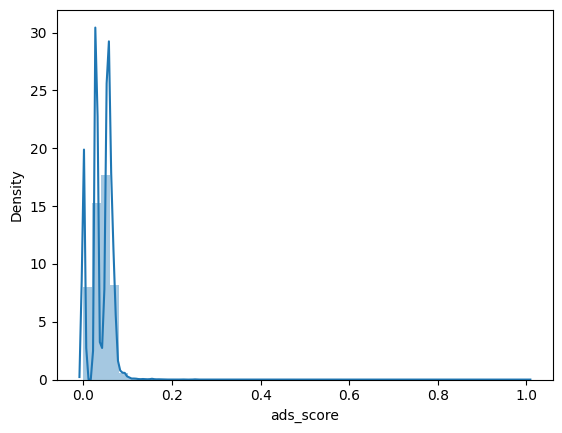

In [60]:
sns.distplot(df2['ads_score'])